# **Laboratorijska vježba 3**: Zadaci za samostalni rad

## **Podaci iz popisa stanovništa u SAD-u iz 2015. godine**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka dobiven iz popisa stanovništva 2015. godine u SAD-u. Skup podataka dostupan je u *Data/acs2015_county_data.csv*. 


In [ ]:
!head Data/acs2015_county_data.csv

CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats
from scipy.stats import skew

In [ ]:
data_folder = './Data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [ ]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

## **Zadatak 1: Izračun deskriptivne statistike i testiranje distribucija**

Za numeričke varijable u skupu podataka izračunajte osnovne mjere u okviru deskriptivne statistike. Zatim se fokusirajte na dohodak po stanovniku države (*IncomePerCap*). Koliko u prosjeku zarađuju stanovnici SAD-a? Kolika je medijalna plaća? 

In [ ]:
df.describe() 

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [ ]:
#prosjecna zarada stanovnika SAD-a
df['IncomePerCap'].mean()

23981.771739130436

In [ ]:
#medijalna plaća
df['IncomePerCap'].median()

23460.0

Pokušajte steći dublji uvid u prihod po stanovniku. Može li se prepoznati distribucija iz koje potječi ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

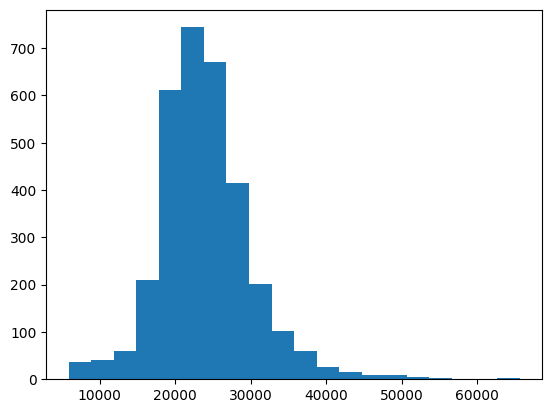

(0.0637621121184162, 0.0009999999999998899)

In [ ]:
#pd.crosstab(df['IncomePerCap'], 1)  

plt.hist(df['IncomePerCap'],bins=20)
plt.show()

diagnostic.kstest_normal(df['IncomePerCap'], dist='norm')  
# D  i  p -vrijednost testa (0.0009999)
# p-vrijednost je manja od 0.05 pa odbacujemo nultu hipotezu da je normalna distribucija
# izgledom kao Poissonova

Izračunajte osnovne mjere u okviru deskriptivne statistike za broj stanovnika države (*TotalPop*) te prokomentirajte dobivene rezultate.

In [ ]:
# Deskriptivna statistika u osnovi opisuje podatke pomoću mjera središnje tendencije, mjera varijabilnosti te distribucije učestalosti. 
#Mjere središnje tendencije uključuju srednju vrijednost, medijan i mod, dok mjere varijabilnosti uključuju standardnu devijaciju, varijancu, 
#minimalne i maksimalne vrijednosti, zaobljenost (engl. kurtosis) te asimetriju (engl. skewness). Mjera distribucije učestalosti opisuje 
#učestalost podataka unutar skupa podataka (count).  

total_population=df['TotalPop']


#srednja vrijednost
total_population.mean()  
#99409.34596273291  

#medijan
total_population.median()
#26035.0

#mod 
total_population.mode()

#standardna devijacija
total_population.std() 
#319305.45373083575

#varijanca
np.var(total_population)
#101924309436.67035

#min i max vrijednosti
total_population.min()
#85
total_population.max()
#10038388

#zaobljenost
total_population.kurtosis()
#341.9011231303699

#asimetrija
skew(total_population)
#14.287924209598035

#count
total_population.count()
#3220

3220

Pokušajte steći dublji uvid u broj stanovnika. Može li se prepoznati distribucija iz koje potječu ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

(0.37787608613878587, 0.0009999999999998899)

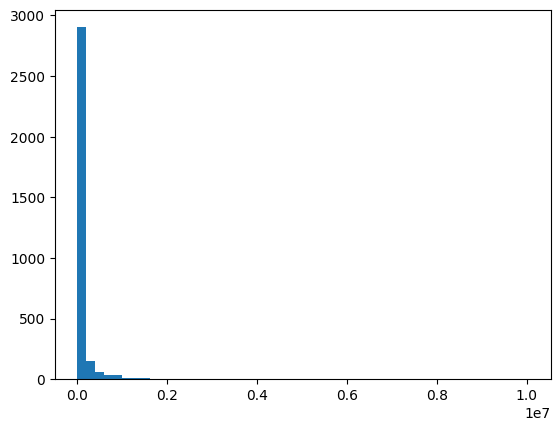

In [ ]:
#Bolji uvid u distribuciju iz koje potječu naši podaci mogu nam pružiti tzv. testovi ponašanja po distribuciji 
#(engl. goodness-of-fit tests). Jedan od najpoznatijih takvih testova jest Kolmogorov-Smirnov test (K-S Test). 
#Ovaj test provjerava usklađenost promatrane distribucije s nekom teorijskom distribucijom. Idealan je za male veličine uzorka.

#Za prepoznavanje distribucije iz koje podaci potječu mogu se koristiti dijagrami koji vizualno prikazuju distribuciju podataka 
#ili veze između varijabli. Najjednostavniji uvid u izgled distribucije podataka daje nam histogram.

plt.hist(df['TotalPop'], bins=50)
diagnostic.kstest_normal(df['TotalPop'], dist='norm')  

#Ovaj test vraća kritičnu vrijednost  D  i  p -vrijednost testa. 
#Ako je  p -vrijednost manja od 0.05, znači da možemo odbaciti nultu hipotezu da podaci potječu iz normalne distribucije. 


## **Zadatak 2: Ispitivanje odnosa između dvije varijable**

Pokušajte odgovoriti na pitanje je li dohodak po stanovniku države u korelaciji s nezaposlenošću. Ispitajte i linearnu i monotonu korelaciju.

In [ ]:
# correlation = df['IncomePerCap'].corr(df['Unemployment'])
# print(correlation)
# -0.5475960044237943

#Negativno koreliraju (smanjenjem Unemployment-a raste IncomePerCap)

#Pearsonov koeficijent korelacije koristi se u slučajevima kada između varijabli postoji linearna povezanost te je njihova distribucija neprekidna. 
#Vrijednost ovog koeficijenta kreće se od +1 (savršena pozitivna korelacija) do -1 (savršena negativna korelacija).

stats.pearsonr(df['IncomePerCap'], df['Unemployment']) #linearna korelacija


PearsonRResult(statistic=-0.5475960044237943, pvalue=2.043834312917008e-251)

In [ ]:
stats.spearmanr(df['IncomePerCap'], df['Unemployment'])  #monotona korelacija

SignificanceResult(statistic=-0.5610346008485645, pvalue=1.861766816019713e-266)

## **Zadatak 3: Testiranje hipoteza**

Zarađuju li stanovnici države New York više od stanovnika države Kalifornija? Pokušajte dati odgovor na ovo pitanje pomoću deskriptivne statistike.

NY mean income: $28,189.76
C mean income: $27,902.60
NY median income: $25,891.00
C median income: $27,146.50


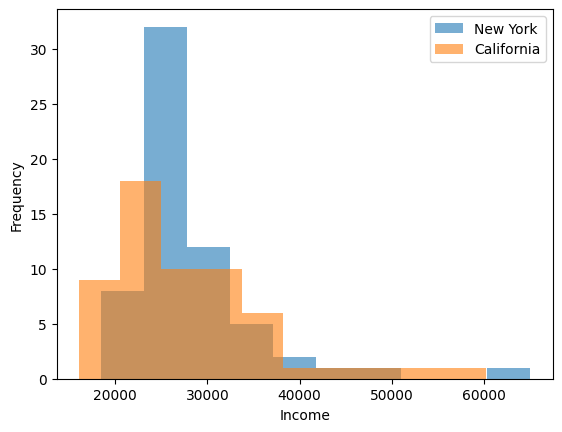

In [ ]:
newyork_df = df[df['State'] == 'New York'] #62 stanovnika
california_df = df[df['State'] == 'California'] #58 stanovnika

#srednja vrijednost
newyork_mean_income = newyork_df['IncomePerCap'].mean()
california_mean_income = california_df['IncomePerCap'].mean()

print(f"NY mean income: ${newyork_mean_income:,.2f}")
print(f"C mean income: ${california_mean_income:,.2f}")

#median
newyork_median_income = newyork_df['IncomePerCap'].median()
california_median_income = california_df['IncomePerCap'].median()

print(f"NY median income: ${newyork_median_income:,.2f}")
print(f"C median income: ${california_median_income:,.2f}")

# Plot
plt.hist(newyork_df['IncomePerCap'], alpha=0.6, label='New York')
plt.hist(california_df['IncomePerCap'], alpha=0.6, label='California')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Gledajući srednju vrijednost i graf zaključili bi da je zarada veća u New York-u, ali medijan govori drugačije

Kako bi potkrijepili dobivene zaključke, provedite testiranje hipoteza. Neka nulta hipoteza pretpostavlja da nema statistički značajne razlike u dohotku stanovnika ovih država. Testirajte hipotezu pomoću dvostranog t-testa (*two-sided t-test*). Prokomentirajte dobivenu $p$-vrijednost te donesite zaključak.

In [ ]:
#print('Descriptive statistics for New York:', newyork_df.describe())
#print('Descriptive statistics for California:', california_df.describe())


t_statistic, p_value = stats.ttest_ind(newyork_df['IncomePerCap'], california_df['IncomePerCap'], equal_var=False)
print('T-test p-value:',t_statistic, p_value)

#ZAKLJ: Vjerojatnost je velika (0.844) zato prihvaćamo H0 koja glasi: nema statistički značajne razlike u dohotku stanovnika NY i stanovnika Kalifornije


T-test p-value: 0.19665849300151653 0.8444542920395708


## **Zadatak 4: Kvantificiranje nesigurnosti**

Ponovno promotrimo pitanje zarađuju li stanovnici države New York više od stanovnika države Kalifornija. Ovaj put pokušajte odgovoriti na pitanje pomoću intervala pouzdanosti s razinom pouzdanosti od 95%. Uz izračun, vizualizirajte intervale pouzdanosti na stupčastim dijagramima. 
Pomoć: provjerite preklapaju li se intervali za ove države.

In [ ]:
import scipy.stats as st

ny = newyork_df['IncomePerCap']
c = california_df['IncomePerCap']

ny_interval = st.t.interval(confidence=0.95, df=len(ny)-1, loc=np.mean(ny), scale=st.sem(ny))
c_interval = st.t.interval(confidence=0.95, df=len(c)-1, loc=np.mean(c), scale=st.sem(c))

print('95% confidence interval for New York:', ny_interval)
print('95% confidence interval for California:', c_interval)



95% confidence interval for New York: (26362.11277119949, 30017.40335783277)
95% confidence interval for California: (25622.335110090782, 30182.871786460943)


## **Zadatak 5: Jačanje gospodarstva poticanjem samozapošljavanja**

Pretpostavimo da je najveći prioritet lokalne uprave u 2018. godini povećanje dohotka po glavi stanovnika. U tu svrhu, dužnosnici planiraju usvojiti strategiju poticanja samozapošljavanja kroz niz kampanja, obrazovnih programa i namjenskih sredstava.

Budući da je neetično i nemoguće u ovom okruženju provoditi kontrolirani eksperiment koji uključuje građane (primjerice, otpustiti zaposlenike i prisiliti ih na samozapošljavanje), dužnosnici su od Vas zatražili da utvrdite učinak samozapošljavanja na gospodarstva, oslanjajući se na podatke iz danog skupa podataka.

Koristeći odgovarajuće grafičke i statističke metode, odredite i kvantificirajte vezu između postotka samozaposlenih građana (*SelfEmployed*) i dohotka po glavi stanovnika u svih 3212 država SAD-a. Zarađuju li građani u državama koje imaju veći postotak samozaposlenih više po glavi stanovnika?

PearsonRResult(statistic=-0.5475960044237943, pvalue=2.043834312917008e-251)

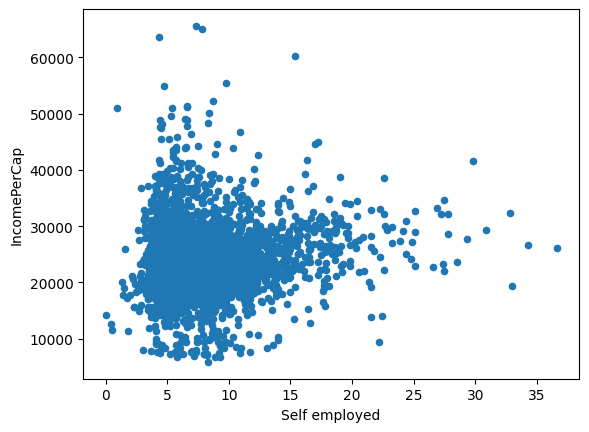

In [ ]:
plt.scatter(df['SelfEmployed'], df['IncomePerCap'], s=20)
plt.xlabel('Self employed')
plt.ylabel('IncomePerCap')

x=['SelfEmployed','IncomePerCap']
self_employed_income = df[x]

#pd.crosstab(self_employed_income['SelfEmployed'], self_employed_income['SelfEmployed'])

stats.pearsonr(df['IncomePerCap'], df['Unemployment'])
#Nemaju utjecaja jedno na drugo, tj. odbacujemo pretpostavku da veći postotak samozaposlenih donosi veći iznos po glavi stanovnika


Pilot program ove strategije zahvatit će sve okruge unutar ograničenog skupa od tri države. Skup A uključuje Wisconsin, Tennessee i Minnesotu. Kvantificirajte ovisnost dohotka po glavi stanovnika o stopama samozapošljavanja u skupu A.

Text(0, 0.5, 'IncomePerCap')

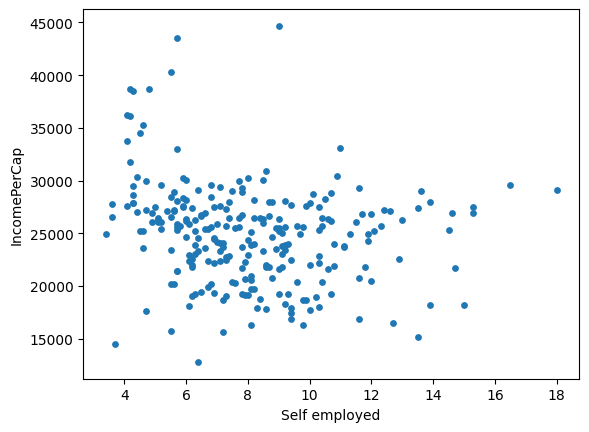

In [ ]:
states_A = ['Wisconsin', 'Tennessee', 'Minnesota']
s = df[df['State'].isin(states_A)]

pd.crosstab(s['SelfEmployed'], s['IncomePerCap'])

stats.spearmanr(s['SelfEmployed'], s['IncomePerCap'])

plt.scatter(s['SelfEmployed'], s['IncomePerCap'], s=15)
plt.xlabel('Self employed')
plt.ylabel('IncomePerCap')


U kojoj je državi unutar skupa A opaženi učinak samozapošljavanja na dohodak po glavi stanovnika najjači? Je li ovaj učinak pozitivan ili negativan?

In [ ]:
stats.spearmanr(s[s['State']=='Wisconsin']['SelfEmployed'], s[s['State']=='Wisconsin']['IncomePerCap'])
#statistic=-0.46351291044049403, pvalue=4.124859155566003e-05

stats.spearmanr(s[s['State']=='Tennessee']['SelfEmployed'], s[s['State']=='Tennessee']['IncomePerCap'])
#statistic=-0.316991392780988, pvalue=0.0017487582457931406

stats.spearmanr(s[s['State']=='Minnesota']['SelfEmployed'], s[s['State']=='Minnesota']['IncomePerCap'])
#statistic=-0.21107460598245847, pvalue=0.04970805582462062

#Učinak samozapošljavanja na dohodak po glavi stanovnika najjači je u Wisconsinu jer mu je korelacija najveća iako je negativna

SignificanceResult(statistic=-0.21107460598245847, pvalue=0.04970805582462062)

Skup B uključuje države New Jersey, Kansas i Rhode Island. Ponovite analizu iz prijašnjih koraka, ali sada za skup B. U kojem biste od dva skupa A i B preporučili poticanje samozapošljavanja? Objasnite svoje razmišljanje. Što zamjećujete kad u oba skupa promatrate korelaciju unutar svake pojedine države, a što kada promatrate korelaciju za države u cjelini?

SignificanceResult(statistic=0.056413673053189874, pvalue=0.0013623847564714516)

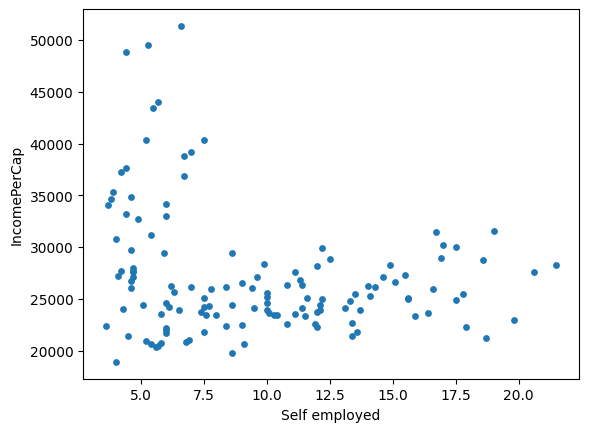

In [ ]:


states_B = ['New Jersey', 'Kansas', 'Rhode Island']
set_B = df[df['State'].isin(states_B)]


plt.scatter(set_B['SelfEmployed'], set_B['IncomePerCap'], s=15)
plt.xlabel('Self employed')
plt.ylabel('IncomePerCap')

stats.spearmanr(set_B[set_B['State']=='New Jersey']['SelfEmployed'], set_B[set_B['State']=='New Jersey']['IncomePerCap']) #(statistic=0.40403460177366013, pvalue=0.06929493068926951)
stats.spearmanr(set_B[set_B['State']=='Kansas']['SelfEmployed'], set_B[set_B['State']=='Kansas']['IncomePerCap'])#(statistic=0.28392575483491556, pvalue=0.0033332825399419903)
stats.spearmanr(set_B[set_B['State']=='Rhode Island']['SelfEmployed'], set_B[set_B['State']=='Rhode Island']['IncomePerCap'])#(statistic=0.9999999999999999, pvalue=1.4042654220543672e-24))

stats.spearmanr(df['SelfEmployed'], df['IncomePerCap'])#(statistic=0.056413673053189874, pvalue=0.0013623847564714516)

#Najveća korelacija je u Rhode Islandu
